In [2]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

import conorm

In [3]:
# FUNCTIONS: 

# define a function that transforms the sample names to coherent condition names
def sample_to_condition(sample: str) -> str:
    """Transform individual sample name to coherent condition name."""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'
    else: 
        raise ValueError(f"Unknown sample name {sample}")

# 1 Import DElncRNA and DESeq data 

In [4]:
# read in DElncRNA data with the lowest padj and the higherst log2FoldCHange 
identifiers = [
    "ccar_ua02-g2594",
    "ccar_ub10-g33126",
    "ccar_ua11-g11216",
    "ccar_ua02-g2594",
    "ccar_ua08-g8194",
    "ccar_ua01-g1077",
    "ccar_ub04-g27028",
    "ccar_ua20-g18868",
    "ccar_ua05-g5867",
    "ccar_ub08-g30830"

]

# Create a DataFrame from the list
partner = pd.DataFrame(identifiers, columns=['partner'])
#partner['partner'] = partner['partner'].str.upper()
# Print the DataFrame
print(partner)

            partner
0   ccar_ua02-g2594
1  ccar_ub10-g33126
2  ccar_ua11-g11216
3   ccar_ua02-g2594
4   ccar_ua08-g8194
5   ccar_ua01-g1077
6  ccar_ub04-g27028
7  ccar_ua20-g18868
8   ccar_ua05-g5867
9  ccar_ub08-g30830


In [5]:
# Import DEseq results
# IMPORT raw data 
deg_na = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_anoxia_normoxia.csv', header=0, sep=',').assign(condition='NvsA')
deg_nr = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(condition='NvsR')
deg_ar = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(condition='AvsR')
deg = pd.concat([deg_na, deg_nr, deg_ar])
deg.rename({'Unnamed: 0': 'gene_id'},axis=1,  inplace=True)
deg.set_index('gene_id', inplace=True)

In [6]:
deg[deg.index.isin(partner['partner'])]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,condition
gene_id,,,,,,,
ccar_ua01-g1077,191.828759,4.454672,0.168745,24.155677,6.508367e-129,2.057935e-126,NvsA
ccar_ua02-g2594,10163.868288,4.532602,0.078665,52.807552,0.000000e+00,0.000000e+00,NvsA
ccar_ub04-g27028,407.406722,-5.839647,0.196608,-27.776791,8.274136e-170,4.515751e-167,NvsA
ccar_ua05-g5867,39.207731,3.283330,0.278626,10.425517,1.896244e-25,3.594112e-24,NvsA
ccar_ua08-g8194,993.275517,3.067239,0.084807,31.704011,1.367979e-220,1.238674e-217,NvsA
ccar_ub08-g30830,1639.132996,-0.291766,0.050480,0.000000,1.000000e+00,1.000000e+00,NvsA
ccar_ub10-g33126,732.882467,3.231236,0.079250,35.996597,9.456329e-284,1.638042e-280,NvsA
ccar_ua11-g11216,737.320652,2.672980,0.069436,33.044415,1.871232e-239,2.070882e-236,NvsA
ccar_ua20-g18868,488.322208,-0.233001,0.064927,0.000000,1.000000e+00,1.000000e+00,NvsA


# 2 Import feature counts data

In [7]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('../10_lncRNA_classification/10_2_expression_for_heatmap/10_2_1_expression_gene/gene_matrix_count.csv', sep=',', index_col=0)
# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
expression = expression.reindex(columns=column_order)
# filter the rows that have as a sum less than 50 counts
expression = expression[(expression.sum(axis=1) >= 50)]
# data normlization to get TMM data 
expression_tmm = conorm.tmm(expression)

In [8]:
expression_tmm

,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
Geneid,,,,,,,,,,,,,,,,,,
scaffold_1-g45527,3.880038,0.969422,3.773200,1.914306,0.000000,4.931010,1.061754,2.093653,4.250583,5.200833,0.000000,6.256956,0.984081,2.966260,0.000000,3.912930,6.963152,2.958485
scaffold_1-g45532,11.640113,5.816531,8.489701,9.571532,10.587884,4.931010,3.185263,7.327784,6.375875,5.200833,7.347485,4.171304,2.952243,4.943767,5.929108,4.891162,6.963152,2.958485
scaffold_1-g45540,1617.005723,1526.839268,1427.213042,1415.629514,1819.190983,1681.474269,1040.519215,1142.087496,989.323206,1229.477010,1124.165140,1127.294865,1021.475966,1022.371101,1045.499451,922.473184,885.315073,856.974603
scaffold_1-g45543,682.886640,686.350604,654.650265,536.962919,720.938649,768.251294,598.829426,640.657697,668.404185,686.510005,701.159957,645.509271,874.847913,776.171484,818.216962,793.346503,765.946748,787.943277
scaffold_1-g45544,5255.511104,5558.664357,5525.851950,5642.417840,7168.960020,5481.310256,7070.221891,5971.097230,3442.972274,6779.806387,6439.545410,6789.839840,6494.933891,5575.580889,6824.403789,5934.936169,5629.211232,5921.901599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scaffold_72-g45760,18.430179,16.480170,15.092802,7.657225,14.438024,11.834423,22.296840,32.451615,22.315561,27.044334,25.191376,21.899345,31.490589,30.651358,26.680988,32.281670,25.863137,22.681721
scaffold_86-g45770,139.681358,176.434760,143.381614,108.158306,205.019936,221.895431,218.721386,253.331965,197.652112,287.086002,316.991477,281.563010,233.227172,126.560446,225.306120,186.842395,163.136710,165.675182
scaffold_129-g45565,4.850047,2.908265,3.773200,2.871459,9.625349,10.848221,3.185263,0.000000,4.250583,2.080333,9.446766,2.085652,4.920404,1.977507,9.881847,2.934697,14.921041,9.861618


In [9]:
# filter expression df for top three DElncRNA
tmm_lnc = expression_tmm[expression_tmm.index.isin(partner['partner'])]
# reset index 
tmm_lnc.reset_index(inplace=True)

In [10]:
tmm_lnc

,Geneid,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
0,ccar_ua01-g1077,20.370198,31.021496,6.603101,19.143063,19.250698,23.668846,396.034354,403.028127,488.817051,515.922671,455.544044,480.742769,144.659891,95.909088,133.404939,117.387892,80.573619,116.367092
1,ccar_ua02-g2594,980.679536,917.072983,836.707183,918.867027,997.186168,1026.636196,24336.470336,21648.367939,21059.513740,24460.559525,21922.794693,23965.183438,7886.424273,9308.125286,7997.379071,6556.113764,5612.300719,7325.209838
2,ccar_ub04-g27028,1112.600819,1270.911924,914.057791,739.879388,1243.595106,793.892543,20.173332,13.608742,25.503498,13.522167,24.141735,13.556738,198.784340,131.504213,230.247044,160.430119,179.052487,200.190845
3,ccar_ua05-g5867,4.850047,3.877687,5.659801,7.657225,7.700279,5.917212,54.149469,52.341315,73.322558,63.450167,56.680595,62.569558,54.124449,70.201497,52.373791,55.759249,45.757858,42.404957
4,ccar_ua08-g8194,276.452688,222.967004,232.051823,204.830775,197.319657,251.481489,1801.797049,1755.527710,1944.641747,2500.560686,1986.969757,2203.491258,935.860929,797.924061,896.283556,679.871541,687.362601,770.192365
5,ccar_ub08-g30830,1633.495884,1662.558314,1788.496978,1471.144397,1662.297792,1813.625326,1403.639186,1281.315394,1404.817699,1638.262513,1427.511289,1420.328961,2105.933110,1886.541645,1931.901160,1685.494481,1897.956358,1665.627277
6,ccar_ub10-g33126,125.131217,156.076903,116.969212,128.258523,136.679957,155.819903,1386.651117,1199.662943,1257.109938,1416.707011,1459.000509,1305.618105,879.768318,806.822842,904.189034,681.828006,629.667911,754.413776
7,ccar_ua11-g11216,200.791952,219.089317,155.644515,148.358739,217.532890,225.840239,1243.314287,1222.693122,1158.283882,1534.245845,1221.781721,1381.744400,868.943428,784.081512,742.126737,692.588562,792.804621,765.261556
8,ccar_ua20-g18868,461.724490,494.405096,472.593347,398.175712,573.670807,576.928122,425.763475,393.606690,485.629114,468.075004,436.650512,424.430167,561.910190,588.308322,615.639091,466.616870,525.220627,518.721106


In [11]:
# convert from long to short format
tmm_lnc = tmm_lnc.melt(id_vars='Geneid', var_name='sample', value_name='measurement')
# write uniform sample name for each condition 
tmm_lnc['condition'] = tmm_lnc['sample'].apply(sample_to_condition)
tmm_lnc

,Geneid,sample,measurement,condition
0,ccar_ua01-g1077,N14,20.370198,Normoxia
1,ccar_ua02-g2594,N14,980.679536,Normoxia
2,ccar_ub04-g27028,N14,1112.600819,Normoxia
3,ccar_ua05-g5867,N14,4.850047,Normoxia
4,ccar_ua08-g8194,N14,276.452688,Normoxia
...,...,...,...,...
157,ccar_ua08-g8194,R13,770.192365,Reoxygenation
158,ccar_ub08-g30830,R13,1665.627277,Reoxygenation
159,ccar_ub10-g33126,R13,754.413776,Reoxygenation
160,ccar_ua11-g11216,R13,765.261556,Reoxygenation


# 3 Normalization of data

In [12]:
grouped = tmm_lnc.groupby(['Geneid'])

tmm_norm = []

for gene_id, data in grouped: 
    # calculate the mean for normoxia
    mean = data.loc[data.condition == 'Normoxia', 'measurement']
    if len(mean) == 0: 
        continue
    mean = mean.mean() 
    # calculate the geomean in normoxia 
    geomean = stats.gmean(data.loc[data.condition == 'Normoxia', 'measurement'])
    # write the calculated mean into a new column
    data["norm_average"] = mean
    # Determination of relative deviation
    data["rel_deviation"] = data["measurement"]/mean
    tmm_norm.append(data)
tmm_norm = pd.concat(tmm_norm)
tmm_norm

,Geneid,sample,measurement,condition,norm_average,rel_deviation
0,ccar_ua01-g1077,N14,20.370198,Normoxia,20.009567,1.018023
9,ccar_ua01-g1077,N15,31.021496,Normoxia,20.009567,1.550333
18,ccar_ua01-g1077,N16,6.603101,Normoxia,20.009567,0.329997
27,ccar_ua01-g1077,N17,19.143063,Normoxia,20.009567,0.956696
36,ccar_ua01-g1077,N18,19.250698,Normoxia,20.009567,0.962075
...,...,...,...,...,...,...
123,ccar_ub10-g33126,R9,806.822842,Reoxygenation,136.489286,5.911254
132,ccar_ub10-g33126,R10,904.189034,Reoxygenation,136.489286,6.624615
141,ccar_ub10-g33126,R11,681.828006,Reoxygenation,136.489286,4.995469
150,ccar_ub10-g33126,R12,629.667911,Reoxygenation,136.489286,4.613314


# Significance test 

In [13]:
from scipy.stats import f_oneway
from scipy.stats import alexandergovern

# test if expression changes are significant 
def stats_test(data: pd.DataFrame):
    grouped = data.groupby('Geneid')
    anova_results = pd.DataFrame(columns=['F', 'p'])
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        std_dev=[]
        for _, sample in data.groupby('condition'):
            samples.append(sample['rel_deviation'])
            std_dev.append(sample['rel_deviation'].std())
        if np.all(np.isclose(std_dev, np.mean(std_dev), rtol=0.5)):
            test='anova'
            res = f_oneway(*samples)
        else:
            test= 'alexander-govern'
            res = alexandergovern(*samples)
        F,p = res.statistic, res.pvalue
        anova_results.loc[geneid, 'F'] = F
        anova_results.loc[geneid, 'p'] = p
        anova_results.loc[geneid, 'Test'] = test
    return anova_results

In [14]:
# apply the defines significance test onto the dataframe 
stat_res = stats_test(tmm_norm)
stat_res

,F,p,Test
ccar_ua01-g1077,42.829004,0.0,alexander-govern
ccar_ua02-g2594,45.289961,0.0,alexander-govern
ccar_ua05-g5867,41.996102,0.0,alexander-govern
ccar_ua08-g8194,41.724182,0.0,alexander-govern
ccar_ua11-g11216,54.039842,0.0,alexander-govern
ccar_ua20-g18868,5.906291,0.012828,anova
ccar_ub04-g27028,32.820755,0.0,alexander-govern
ccar_ub08-g30830,15.213562,0.000246,anova
ccar_ub10-g33126,51.284421,0.0,alexander-govern


In [15]:
from scipy.stats import tukey_hsd
from scipy.stats import mannwhitneyu

# perform post-hoc test 
def posthoc_test(data: pd.DataFrame): 
    grouped = data.groupby('Geneid')
    posthoc_results = pd.DataFrame(index=data['Geneid'].unique())
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        groups = list(data.groupby('condition').groups.keys())
        names = []
        for i in groups: 
            for j in groups: 
                names.append('p ' + i+j)
        for name, sample in data.groupby(['condition']):
            samples.append(sample['rel_deviation'])
        test = 'tukey_hsd'
        res = tukey_hsd(*samples)
        posthoc_results.loc[geneid,names] = res.pvalue.flatten()
    return posthoc_results


In [16]:
post_res = posthoc_test(tmm_norm)
post_res.drop(columns=['p AnoxiaAnoxia', 'p ReoxygenationReoxygenation', 'p NormoxiaNormoxia', 'p AnoxiaNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationAnoxia'], inplace=True)
post_res

,p AnoxiaReoxygenation,p NormoxiaAnoxia,p NormoxiaReoxygenation
ccar_ua01-g1077,2.103751e-11,6.009637e-13,2.839498e-04
ccar_ua02-g2594,9.549028e-13,4.884981e-15,1.801630e-07
ccar_ua05-g5867,2.456327e-01,3.750942e-09,2.453648e-08
ccar_ua08-g8194,7.898335e-09,3.992828e-11,1.290038e-04
ccar_ua11-g11216,1.304629e-07,3.622658e-12,3.013221e-08
ccar_ua20-g18868,9.710638e-03,1.918778e-01,2.766962e-01
ccar_ub04-g27028,1.157557e-01,4.707991e-09,5.548990e-08
ccar_ub08-g30830,1.694264e-04,1.949213e-02,6.978452e-02
ccar_ub10-g33126,2.661699e-08,5.421219e-13,4.467190e-09


# 5 PLOT (Barplot)

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


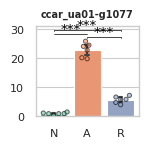

/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


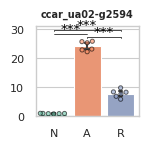

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


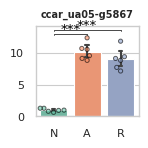

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


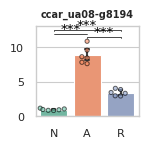

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


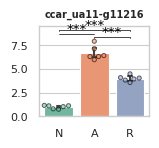

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


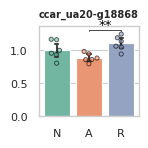

/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


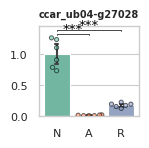

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


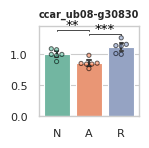

/tmp/ipykernel_21377/2043158822.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


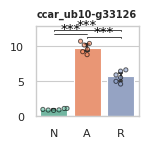

In [17]:
# define sig list 
sig_list = {'p AnoxiaReoxygenation': (1,2),
            'p NormoxiaAnoxia': (0,1),
            'p NormoxiaReoxygenation': (0,2)}

def sig_cat(s):
    if s < 0.0027:
        return "***"
    if s < 0.0455:
        return "**"
    
# set sns colorpallete to colorblind 
sns.set_theme(palette='Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

for geneid, data in tmm_norm.groupby('Geneid'): 
    if np.any(stat_res.loc[geneid, 'Test'] == ''):
        continue
    # PLOT
    plt.figure(figsize=(4/2.54, 4/2.54))
    g = sns.barplot(data=data, x='condition', y='rel_deviation', capsize=0.1, err_kws={"linewidth": 1.5}, hue='condition', legend=False)
    sns.swarmplot(data=data, x='condition', y='rel_deviation', size=3, ax=g, 
                  dodge=False, legend=False, linewidth=0.7, edgecolor="k", alpha=0.6, hue='condition')
    g.set_xticklabels(['N', 'A', 'R'])
    # significance bars 
    x_pos = np.array([p.get_x() for p in g.patches])
    x_width = np.array([p.get_width() for p in g.patches])
    x_pos = x_pos + (x_width/2)
    y, h, col = data['rel_deviation'].max() * 1.04, data['rel_deviation'].max() * 0.01, 'k'
    offset=0
    sig_info = post_res.loc[geneid, sig_list.keys()]
    sig_info = sig_info.loc[sig_info <= 0.05]
    for name, value in sig_info.items():
        height= np.array([y, y+h, y+h, y]) + offset
        x1, x2 = x_pos[list(sig_list[name])]
        plt.plot([x1, x1, x2, x2], height, lw=0.5, c=col)
        plt.text((x1 + x2) * .5, y + h + offset - (data['rel_deviation'].max() * 0.015), sig_cat(value), ha='center', va='bottom', color=col)
        offset += data['rel_deviation'].max() * 0.05     
    plt.title(geneid, fontdict={'weight': 'bold'}, fontsize=7)
    #plt.ylim(top=1.6)
    plt.ylabel('')
    plt.xlabel('')

    plt.tight_layout()
    plt.savefig(f'DELncRNA_expression_top10/{geneid}.svg')
    plt.show()
    plt.close()
